In [35]:
import psycopg2

In [36]:
conn = psycopg2.connect(database="HealthcareSense",
						user='felixhab', password='',
						host='127.0.0.1', port='5432'
)

conn.close()


Generate some data, then put it into the database
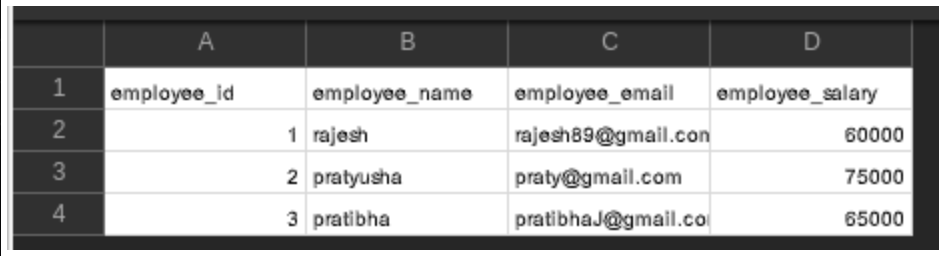


In [32]:
import pandas as pd
from pathlib import Path

sample_data = pd.DataFrame({
    "employee_id": [1, 2, 3],
    "employee_name": ["rajesh", "pratyusha", "pratibha"],
    "employee_email": ["rajesh89@gmail.com", "praty@gmail.com", "pratibhaJ@gmail.com"],
    "employee_salary": [60000, 75000, 65000]
})
sample_data.set_index("employee_id", inplace=True)

output_csv_path = Path("sample_details.csv")
output_csv = sample_data.to_csv(output_csv_path)
sample_data

,employee_name,employee_email,employee_salary
employee_id,,,
1,rajesh,rajesh89@gmail.com,60000
2,pratyusha,praty@gmail.com,75000
3,pratibha,pratibhaJ@gmail.com,65000


In [33]:
conn = psycopg2.connect(database="HealthcareSense",
						user='felixhab', password='',
						host='127.0.0.1', port='5432'
)

conn.autocommit = True
cursor = conn.cursor()

sql0 = """DROP TABLE DETAILS"""

cursor.execute(sql0)


sql = '''CREATE TABLE DETAILS(employee_id int NOT NULL,\
employee_name char(20),\
employee_email varchar(30), employee_salary float);'''


cursor.execute(sql)

sql2 = f'''COPY details(employee_id,employee_name,\
employee_email,employee_salary)
FROM '{output_csv_path.absolute()}'
DELIMITER ','
CSV HEADER;'''

cursor.execute(sql2)

sql3 = '''select * from details;'''
cursor.execute(sql3)
for i in cursor.fetchall():
	print(i)

conn.commit()

conn.close()


(1, 'rajesh              ', 'rajesh89@gmail.com', 60000.0)
(2, 'pratyusha           ', 'praty@gmail.com', 75000.0)
(3, 'pratibha            ', 'pratibhaJ@gmail.com', 65000.0)


In [34]:
conn = psycopg2.connect(database="HealthcareSense",
						user='felixhab', password='',
						host='127.0.0.1', port='5432'
)

conn.autocommit = True
cursor = conn.cursor()

sql2 = f'''COPY details(employee_id,employee_name,\
employee_email,employee_salary)
FROM '{output_csv_path.absolute()}'
DELIMITER ','
CSV HEADER;'''

cursor.execute(sql2)

sql3 = '''select * from details;'''
cursor.execute(sql3)
for i in cursor.fetchall():
	print(i)

conn.commit()

conn.close()


(1, 'rajesh              ', 'rajesh89@gmail.com', 60000.0)
(2, 'pratyusha           ', 'praty@gmail.com', 75000.0)
(3, 'pratibha            ', 'pratibhaJ@gmail.com', 65000.0)
(1, 'rajesh              ', 'rajesh89@gmail.com', 60000.0)
(2, 'pratyusha           ', 'praty@gmail.com', 75000.0)
(3, 'pratibha            ', 'pratibhaJ@gmail.com', 65000.0)
